In [2]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
os.chdir('..')

In [5]:
data = pd.read_csv('cinc-2021_data/preprocessed/patient_data.csv')
data['Diagnoses'] = data['Diagnoses'].apply(ast.literal_eval)

In [6]:
# data_code = pd.read_csv('cinc-2021_data/preprocessed/patient_code_data.csv')

In [7]:
data.head()

,Record,Source,Age,Sex,Diagnoses,Signal Length,Sample Frequency
0,JS12507,ningbo,89.0,Male,"[LAnFB, AVJR, LQT, STach, TInv, TAb, CHB]",5000,500
1,JS21257,ningbo,64.0,Female,"[LQRSV, SNR, TAb, LAD]",5000,500
2,JS15108,ningbo,83.0,Female,"[AFL, LQRSV]",5000,500
3,JS31590,ningbo,63.0,Female,[SB],5000,500
4,JS37087,ningbo,41.0,Female,[SNR],5000,500


# Age Distribution

(0.0, 100.0)

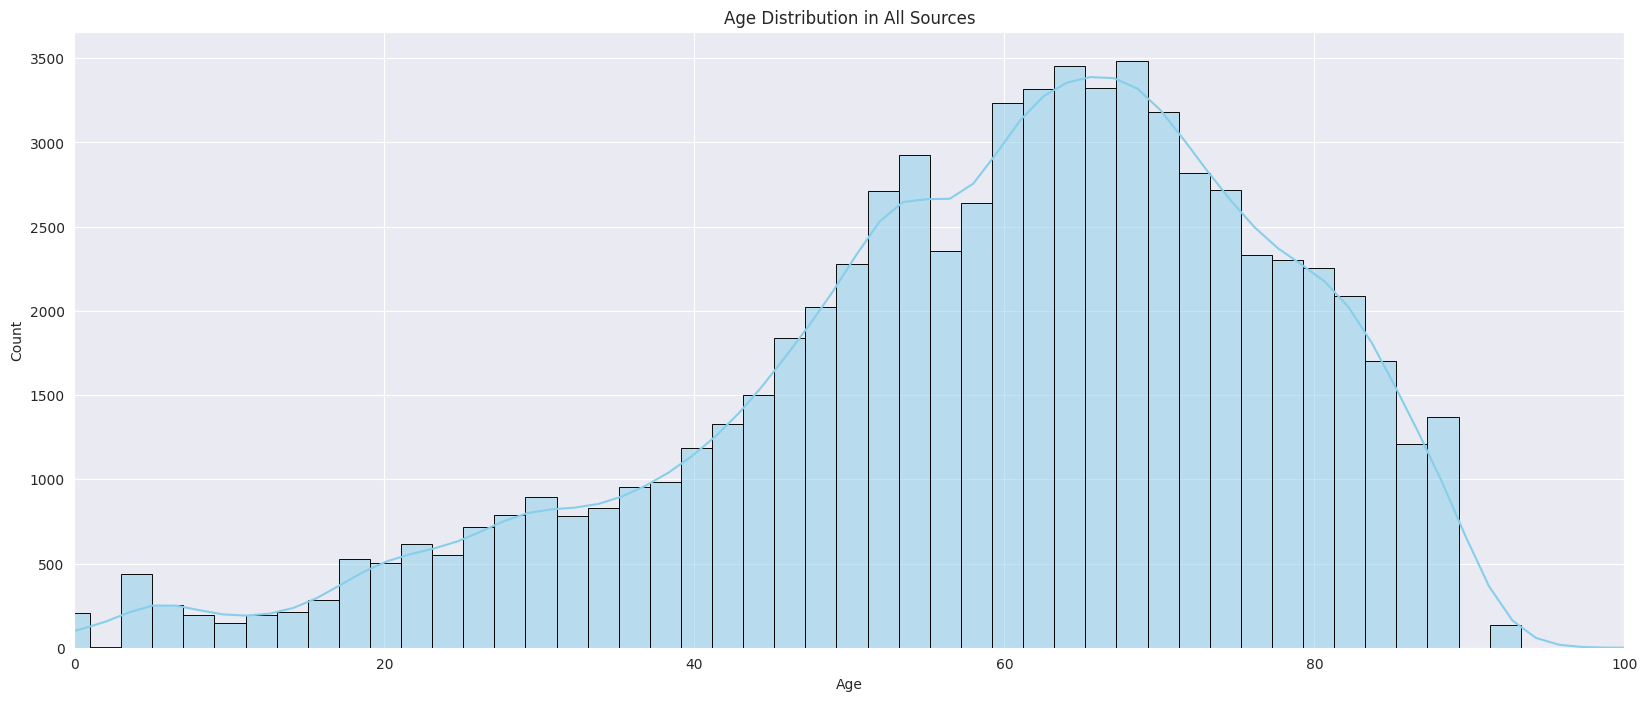

In [12]:
plt.figure(figsize=(20, 8))
sns.histplot(data['Age'], bins=150, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution in All Sources')
plt.xlim([0, 100])

(0.0, 100.0)

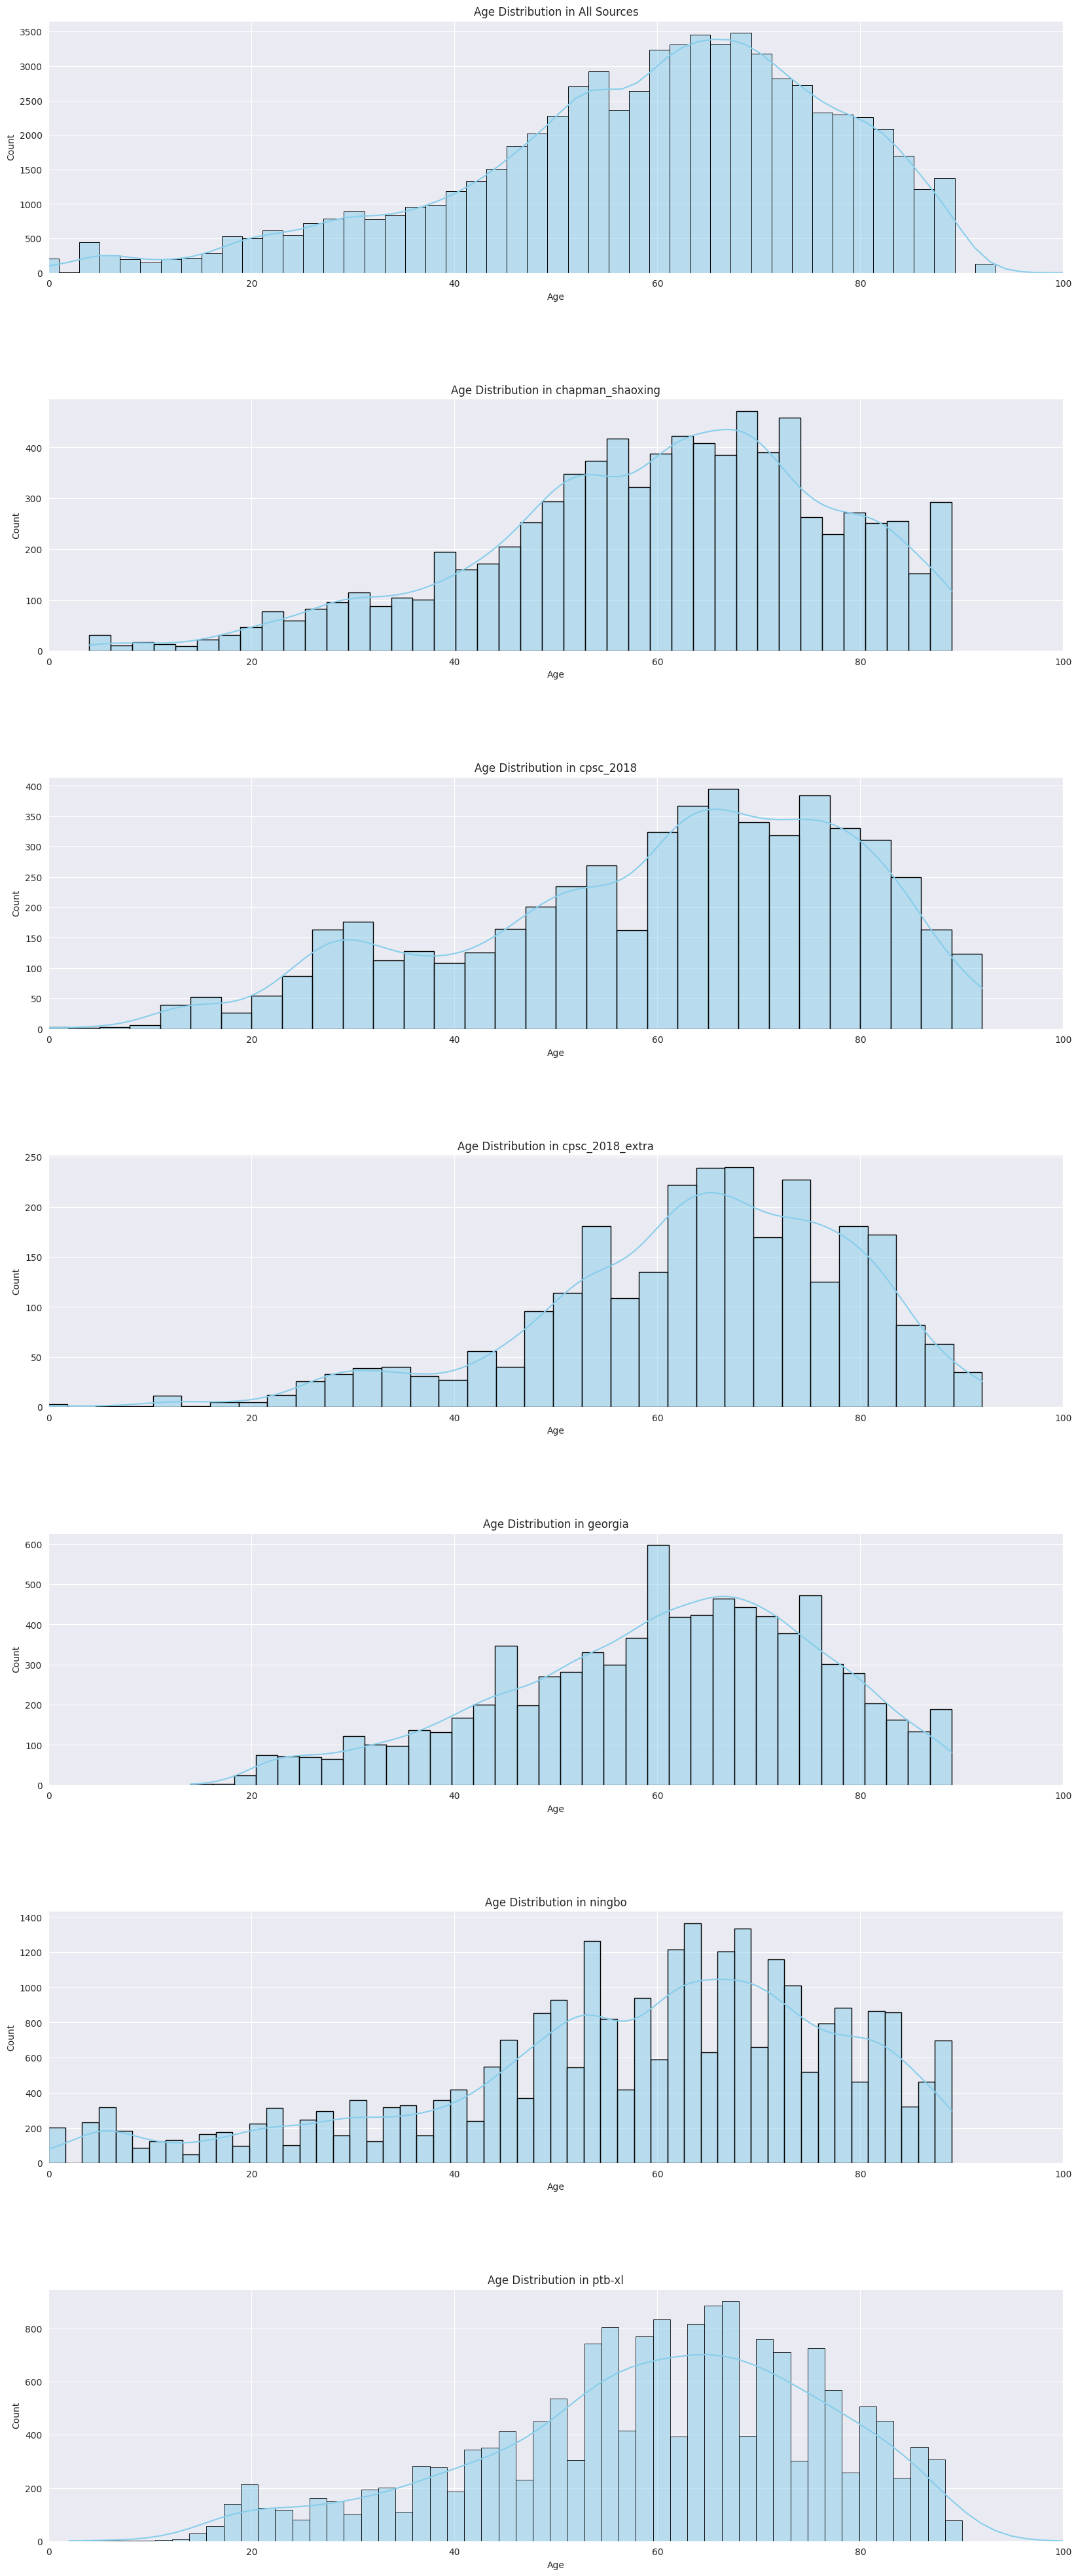

In [8]:
# Unique sources
sources = sorted(data['Source'].unique())

# Setup for multiple subplots
fig, axes = plt.subplots(nrows=len(sources) + 1, ncols=1, figsize=(20, 50))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot Age distribution in different sources
for i, source in enumerate(sources, start=1):
    sns.histplot(data[data['Source'] == source]['Age'], kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    # data[data['Source'] == source]['Age'].hist(ax=axes[i], bins=15)
    axes[i].set_title(f'Age Distribution in {source}')
    axes[i].set_xlim([0, 100])

sns.histplot(data['Age'], bins=150, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Age Distribution in All Sources')
axes[0].set_xlim([0, 100])

# Gender Distribution

In [17]:
# Sex distribution in different sources
sex_count = pd.DataFrame(index=['Male', 'Female', 'Unknown'])
for source in sources:
    sex_count[source] = data[data['Source'] == source]['Sex'].value_counts()
total_sex_count = data['Sex'].value_counts()

print(f"SOURCE\t\t\t\t\t\tMALE\tFEMALE\tUnknown")
print(f"chapman_shaoxing\t\t{sex_count['chapman_shaoxing']['Male']}\t{sex_count['chapman_shaoxing']['Female']}\t{sex_count['chapman_shaoxing']['Unknown']}")
print(f"cpsc_2018\t\t\t\t{sex_count['cpsc_2018']['Male']}\t{sex_count['cpsc_2018']['Female']}\t{sex_count['cpsc_2018']['Unknown']}")
print(f"cpsc_2018_extra\t\t\t{sex_count['cpsc_2018_extra']['Male']}\t{sex_count['cpsc_2018_extra']['Female']}\t{sex_count['cpsc_2018_extra']['Unknown']}")
print(f"georgia\t\t\t\t\t{sex_count['georgia']['Male']}\t{sex_count['georgia']['Female']}\t{sex_count['georgia']['Unknown']}")
print(f"ningbo\t\t\t\t\t{sex_count['ningbo']['Male']}\t{sex_count['ningbo']['Female']}\t{sex_count['ningbo']['Unknown']}")
print(f"ptb-xl\t\t\t\t\t{sex_count['ptb-xl']['Male']}\t{sex_count['ptb-xl']['Female']}\t{sex_count['ptb-xl']['Unknown']}")
print(f"total\t\t\t\t\t{total_sex_count['Male']}\t{total_sex_count['Female']}\t{total_sex_count['Unknown']}")

SOURCE						MALE	FEMALE	Unknown
chapman_shaoxing		4625.0	3655.0	nan
cpsc_2018				2934.0	2497.0	nan
cpsc_2018_extra			1433.0	1290.0	nan
georgia					4450.0	3857.0	nan
ningbo					15800	12043	17
ptb-xl					9070.0	8458.0	nan
total					38312	31800	17


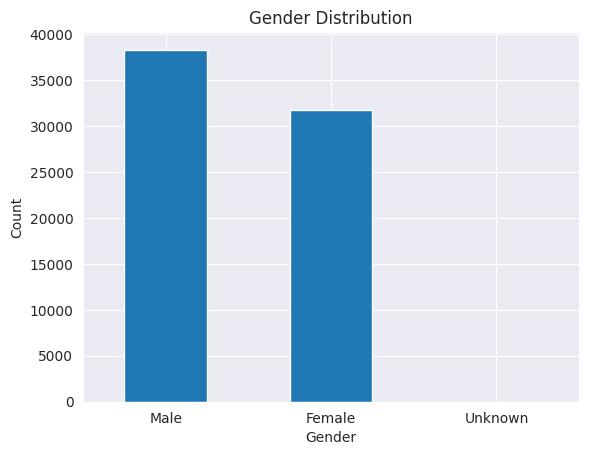

In [24]:
gender_counts = data['Sex'].value_counts()

gender_counts.plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

# Diagnose Distribution

Text(0.5, 1.0, 'Diagnoses Distribution in All Sources')

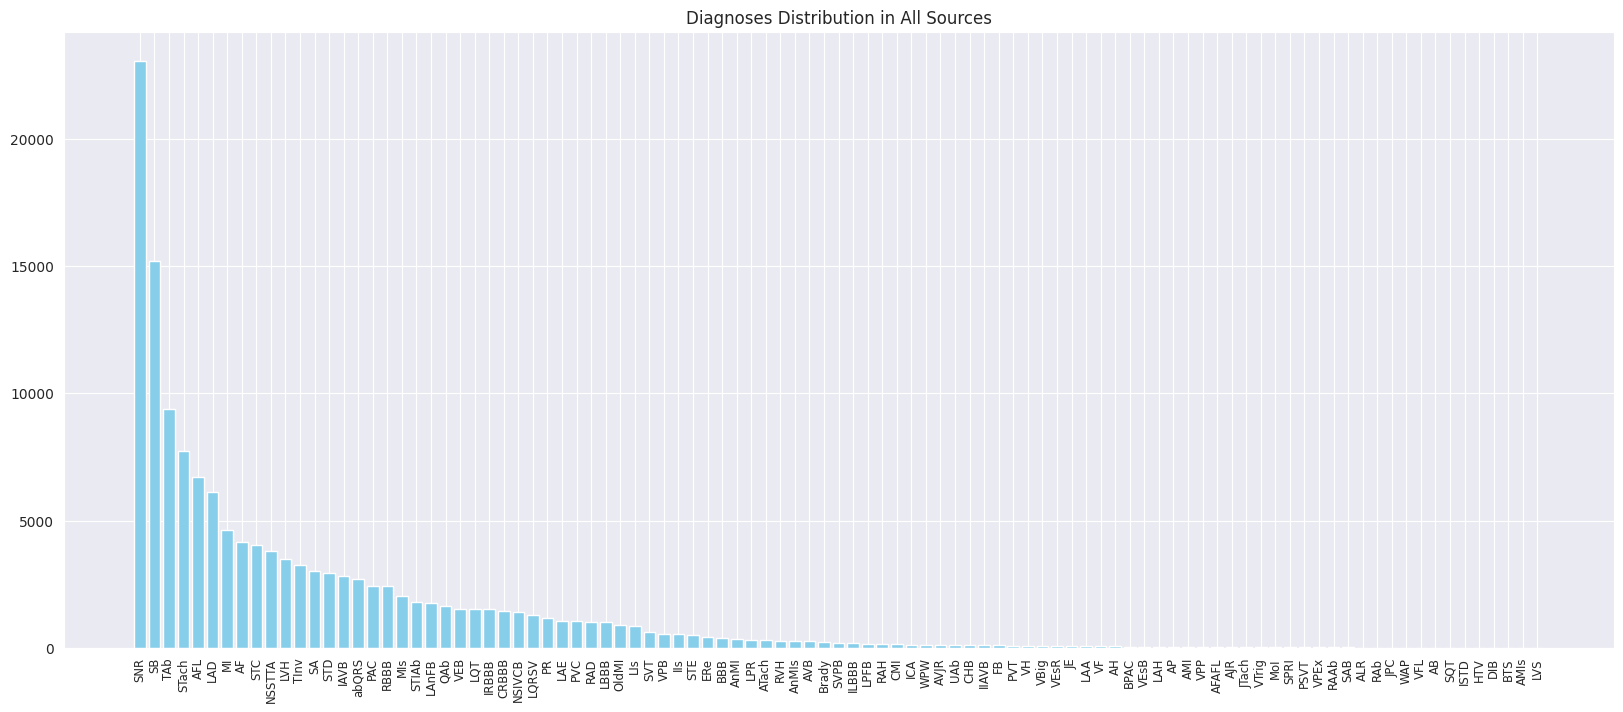

In [32]:
diagnoses = data['Diagnoses'].values
diagnoses = np.concatenate(diagnoses)

unique_values, counts = np.unique(diagnoses, return_counts=True)
sorted_indices = np.argsort(-counts)
unique_values = unique_values[sorted_indices]
counts = counts[sorted_indices]

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(unique_values, counts, color='skyblue')
ax.set_xticklabels(unique_values, rotation=90, fontsize='small')
ax.set_title('Diagnoses Distribution in All Sources')


Text(0.5, 1.0, 'Diagnoses Distribution in All Sources')

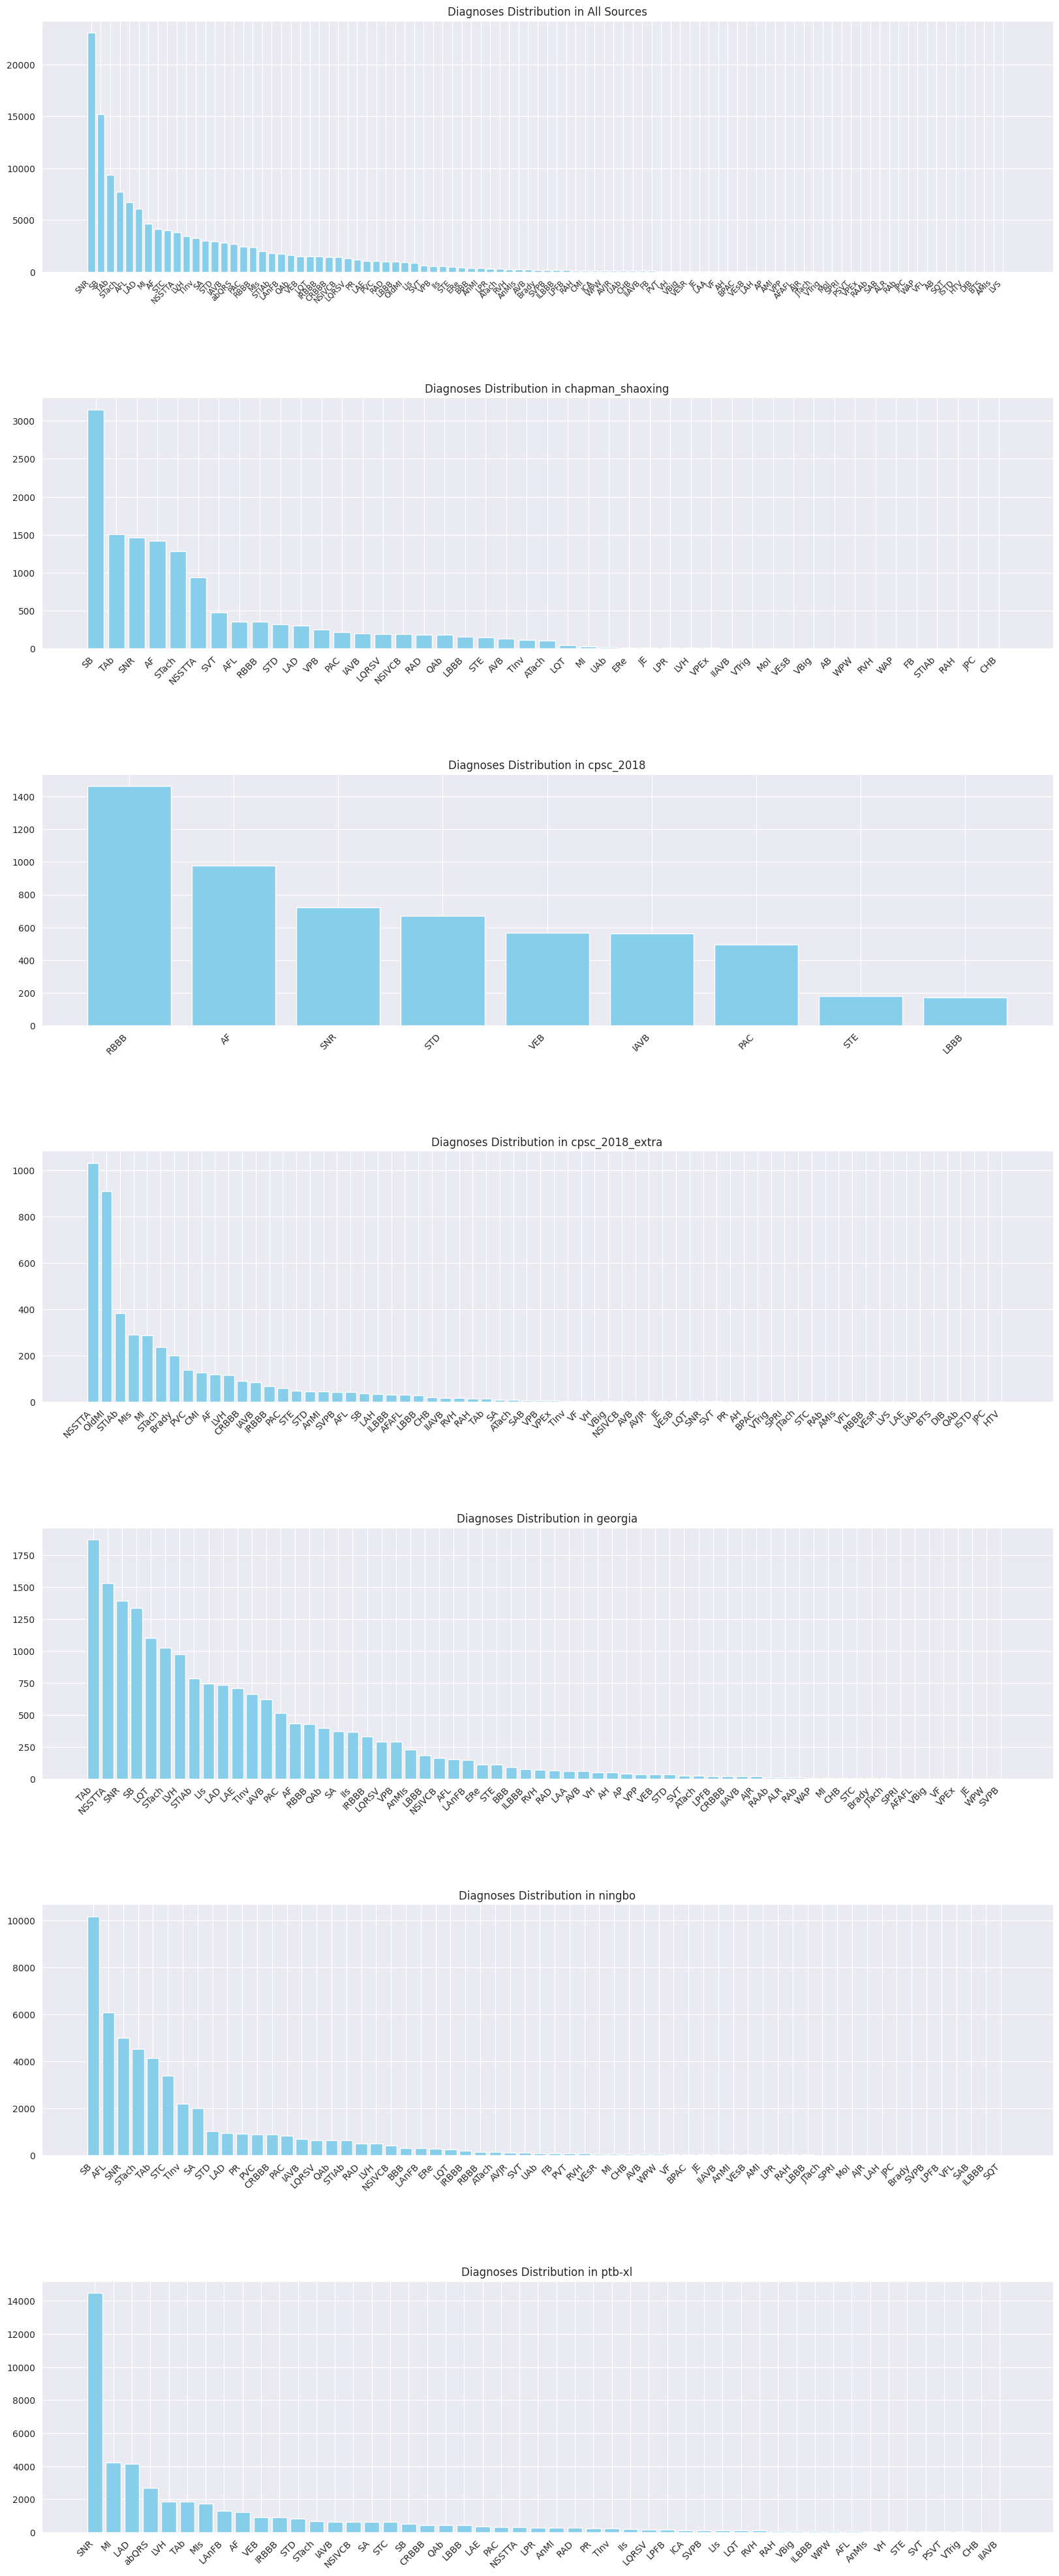

In [25]:
# dx mapping: https://www.kaggle.com/datasets/bjoernjostein/physionet-snomed-mappings

# Setup for multiple subplots
fig, axes = plt.subplots(nrows=len(sources) + 1, ncols=1, figsize=(20, 50))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Diagnose in different sources
diagnose_dict = dict()
for i, source in enumerate(sources, start=1):
    diagnoses = data[data['Source'] == source]['Diagnoses'].values
    diagnoses = np.concatenate(diagnoses)
     
    unique_values, counts = np.unique(diagnoses, return_counts=True)
    sorted_indices = np.argsort(-counts)
    unique_values = unique_values[sorted_indices]
    counts = counts[sorted_indices]
         
    axes[i].bar(unique_values, counts, color='skyblue')
    axes[i].set_xticklabels(unique_values, rotation=45, ha='right')
    axes[i].set_title(f'Diagnoses Distribution in {source}')

diagnoses = data['Diagnoses'].values
diagnoses = np.concatenate(diagnoses)

unique_values, counts = np.unique(diagnoses, return_counts=True)
sorted_indices = np.argsort(-counts)
unique_values = unique_values[sorted_indices]
counts = counts[sorted_indices]

axes[0].bar(unique_values, counts, color='skyblue')
axes[0].set_xticklabels(unique_values, rotation=45, ha='right', fontsize='small')
axes[0].set_title('Diagnoses Distribution in All Sources')

In [98]:
# Duration in different sources
data['Duration'] = data['Signal Length'] / data['Sample Frequency']

source_strings = ['chapman_shaoxing\t\t', 'cpsc_2018\t\t\t\t', 'cpsc_2018_extra\t\t\t', 'georgia\t\t\t\t\t', 'ningbo\t\t\t\t\t', 'ptb\t\t\t\t\t\t', 'ptb-xl\t\t\t\t\t', 'st_petersburg_incart\t']

print(f"SOURCE\t\t\t\t\t\tMEAN\tMAX\t\tMIN")
for source, source_string in zip(sources, source_strings):
    duration = data[data['Source'] == source]['Duration'].values
    print(f"{source_string}\t{duration.mean():.1f}\t{duration.max():.1f}\t{duration.min():.1f}")


SOURCE						MEAN	MAX		MIN
chapman_shaoxing			10.0	10.0	10.0
cpsc_2018					15.9	144.0	6.0
cpsc_2018_extra				16.1	98.0	8.0
georgia						10.0	10.0	5.0
ningbo						10.0	10.0	10.0
ptb							110.3	120.0	32.0
ptb-xl						10.0	10.0	10.0
st_petersburg_incart		1800.0	1800.0	1800.0


In [93]:
# Sample Frequency in different sources
print(f"SOURCE\t\t\t\t\t\tSample Frequency")
source_strings = ['chapman_shaoxing\t\t', 'cpsc_2018\t\t\t\t', 'cpsc_2018_extra\t\t\t', 'georgia\t\t\t\t\t', 'ningbo\t\t\t\t\t', 'ptb\t\t\t\t\t\t', 'ptb-xl\t\t\t\t\t', 'st_petersburg_incart\t']
for source, source_string in zip(sources, source_strings):
    fs = data[data['Source'] == source]['Sample Frequency'].values
    print(f"{source_string}\t{fs.mean():.0f}")


SOURCE						Sample Frequency
chapman_shaoxing			500
cpsc_2018					500
cpsc_2018_extra				500
georgia						500
ningbo						500
ptb							1000
ptb-xl						500
st_petersburg_incart		257
